In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.signal import find_peaks
from scipy.stats import pearsonr

In [59]:
data = np.load("data/traces_mso5074_1.npz", allow_pickle=True)
print(data.files)
plaintexts = data['plaintexts']
ciphertexts = data['ciphertexts']
traces = data['waves']
print(data.files)
print(f"dtype of traces is {ciphertexts.dtype}")
print(f"dtype of traces is {traces.dtype}")
print(f"Shape of traces captured is {traces.shape}")
print(f"Shape of ciphertext data is {ciphertexts.shape}")
print(f"Shape of plaintext data is {plaintexts.shape}")
print(f"Single trace is {len(traces[120])}")
print(f"Single ciphertext is {ciphertexts[50]}")

['waves', 'plaintexts', 'keys', 'ciphertexts', 'rigol_config', 'target_config']
['waves', 'plaintexts', 'keys', 'ciphertexts', 'rigol_config', 'target_config']
dtype of traces is uint8
dtype of traces is float32
Shape of traces captured is (1973, 1000)
Shape of ciphertext data is (1973, 16)
Shape of plaintext data is (1973, 16)
Single trace is 1000
Single ciphertext is [ 32 209 169  96  98 125  31 244  83 158 171 124   8   5 219  75]


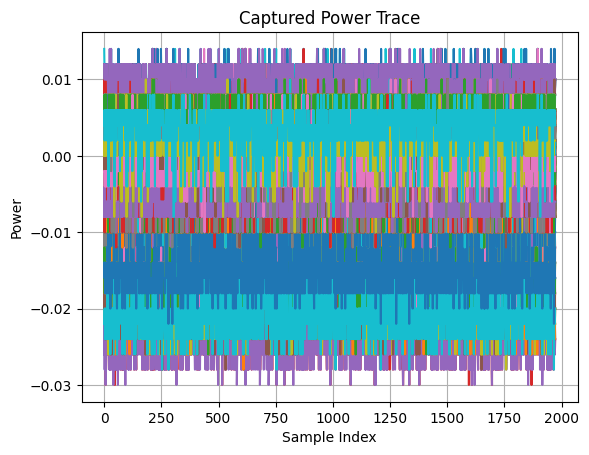

In [60]:
# Example: plot the waveform
plt.plot(traces)
plt.title("Captured Power Trace")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.grid(True)
plt.show()

In [61]:
SAMPLE_RATE_HZ = 29_500_000  # based on extclk_x4 * 7.37 MHz
time_axis = np.arange(traces.shape[1]) / SAMPLE_RATE_HZ * 1e6  # time in µs

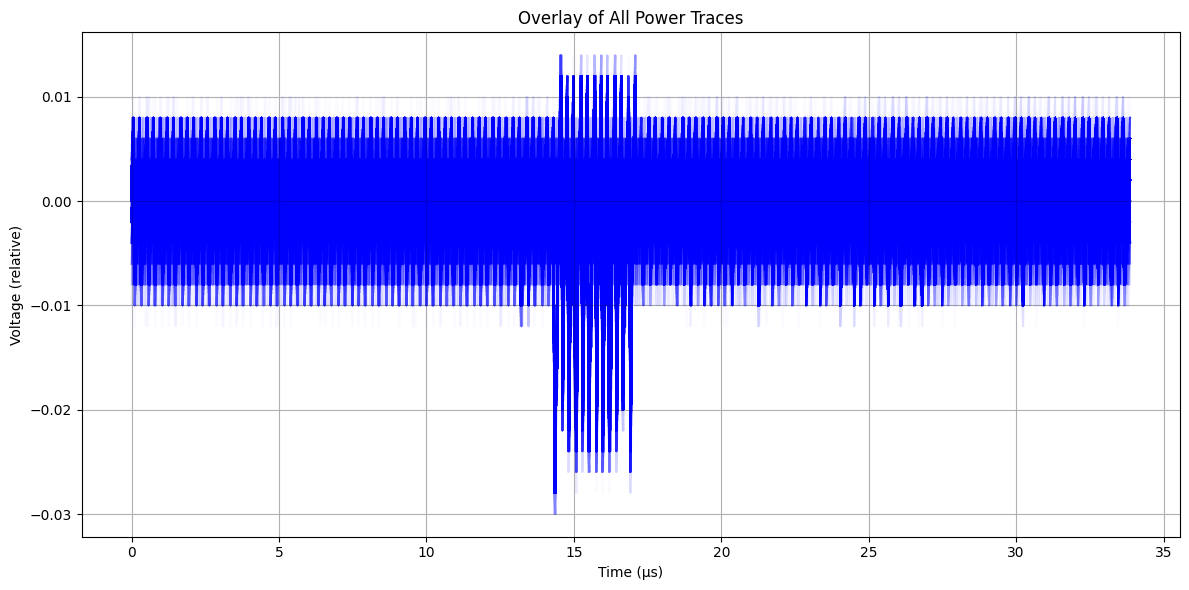

In [62]:
# === Plot all traces ===
plt.figure(figsize=(12, 6))
for trace in traces:
    plt.plot(time_axis, trace, color='blue', alpha=0.02)  # alpha for transparency

plt.title("Overlay of All Power Traces")
plt.xlabel("Time (µs)")
plt.ylabel("Voltage (relative)")
plt.grid(True)
plt.tight_layout()
plt.show()

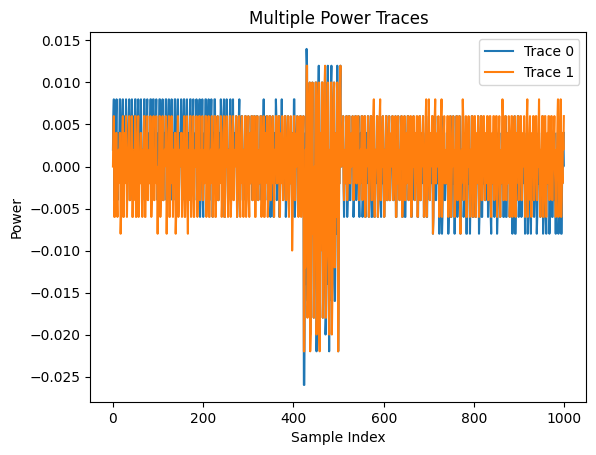

In [63]:
# multiple traces
for i in range(2):  # Plot first 2 traces
    plt.plot(traces[i], label=f"Trace {i}")
plt.legend()
plt.title("Multiple Power Traces")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.show()

# Attack Using S-Box output in the First round as intermediate Values

Calculating SNR...
Global SNR = 2.6406


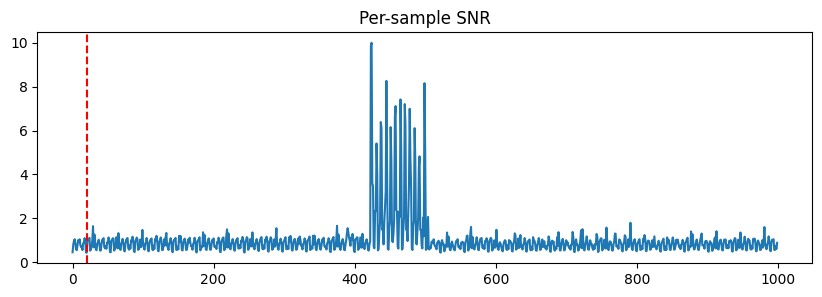

Detecting leakage window...


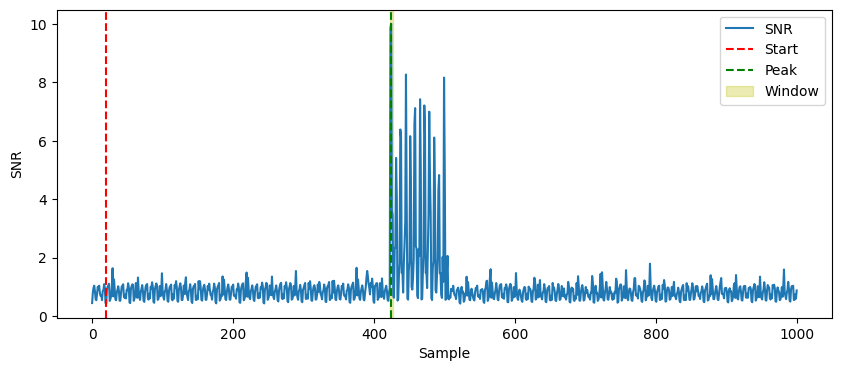

Window: (423, 427)
Testing power models on byte 0...
 Model hw: guess=0xb5, corr=0.0679
 Model hd_in_out: guess=0x17, corr=0.0673
 Model value: guess=0x8b, corr=0.0669
 Model msb: guess=0x8b, corr=0.0598
Selected model: hw
CPA byte 0: 0xb5 (corr=0.0679)
CPA byte 1: 0x15 (corr=0.0647)
CPA byte 2: 0x58 (corr=0.0645)
CPA byte 3: 0x05 (corr=0.0785)
CPA byte 4: 0x63 (corr=0.0605)
CPA byte 5: 0x83 (corr=0.0663)
CPA byte 6: 0x82 (corr=0.0639)
CPA byte 7: 0x22 (corr=0.0653)
CPA byte 8: 0xad (corr=0.0825)
CPA byte 9: 0x5d (corr=0.0735)
CPA byte 10: 0x96 (corr=0.0869)
CPA byte 11: 0x42 (corr=0.0650)
CPA byte 12: 0x2d (corr=0.0834)
CPA byte 13: 0x54 (corr=0.0750)
CPA byte 14: 0x95 (corr=0.0796)
CPA byte 15: 0x16 (corr=0.0794)


DPA byte 0: 100%|██████████| 256/256 [00:00<00:00, 770.09it/s]


DPA byte 0: 0x8b (diff=0.0010)


DPA byte 1: 100%|██████████| 256/256 [00:00<00:00, 2491.02it/s]


DPA byte 1: 0xc1 (diff=0.0013)


DPA byte 2: 100%|██████████| 256/256 [00:00<00:00, 2755.37it/s]


DPA byte 2: 0xe1 (diff=0.0010)


DPA byte 3: 100%|██████████| 256/256 [00:00<00:00, 1168.88it/s]


DPA byte 3: 0x55 (diff=0.0012)


DPA byte 4: 100%|██████████| 256/256 [00:00<00:00, 3076.76it/s]


DPA byte 4: 0x9c (diff=0.0011)


DPA byte 5: 100%|██████████| 256/256 [00:00<00:00, 3068.68it/s]


DPA byte 5: 0xbc (diff=0.0012)


DPA byte 6: 100%|██████████| 256/256 [00:00<00:00, 1460.70it/s]


DPA byte 6: 0x9c (diff=0.0012)


DPA byte 7: 100%|██████████| 256/256 [00:00<00:00, 2688.76it/s]


DPA byte 7: 0xac (diff=0.0011)


DPA byte 8: 100%|██████████| 256/256 [00:00<00:00, 2167.06it/s]


DPA byte 8: 0x0e (diff=0.0014)


DPA byte 9: 100%|██████████| 256/256 [00:00<00:00, 1543.49it/s]


DPA byte 9: 0xf6 (diff=0.0012)


DPA byte 10: 100%|██████████| 256/256 [00:00<00:00, 1609.40it/s]


DPA byte 10: 0x92 (diff=0.0012)


DPA byte 11: 100%|██████████| 256/256 [00:00<00:00, 1516.61it/s]


DPA byte 11: 0xca (diff=0.0012)


DPA byte 12: 100%|██████████| 256/256 [00:00<00:00, 1550.06it/s]


DPA byte 12: 0xf1 (diff=0.0013)


DPA byte 13: 100%|██████████| 256/256 [00:00<00:00, 2333.98it/s]


DPA byte 13: 0xf5 (diff=0.0012)


DPA byte 14: 100%|██████████| 256/256 [00:00<00:00, 1765.45it/s]


DPA byte 14: 0x5f (diff=0.0015)


DPA byte 15: 100%|██████████| 256/256 [00:00<00:00, 2312.07it/s]

DPA byte 15: 0x12 (diff=0.0010)
Recovered CPA key: b515580563838222ad5d96422d549516
Recovered DPA key: 8bc1e1559cbc9cac0ef692caf1f55f12


In [64]:
# AES S-box for intermediate value calculations
SBOX = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
], dtype=np.uint8)

class PowerAnalyzer:
    """
    PowerAnalyzer performs DPA and CPA on AES first-round S-box,
    given power traces and corresponding plaintext/ciphertext byte arrays.
    """
    def __init__(self, traces: np.ndarray, plaintexts: np.ndarray,
                 ciphertexts: np.ndarray = None, encryption_start: int = 20):
        """
        Args:
            traces:       Power traces array of shape (num_traces, trace_length)
            plaintexts:   Plaintexts as byte-array of shape (num_traces, 16)
            ciphertexts:  Optional ciphertexts byte-array (not used here)
            encryption_start: sample index where encryption begins
        """
        self.traces = traces
        self.plaintexts = plaintexts
        self.ciphertexts = ciphertexts
        self.num_traces, self.trace_length = traces.shape
        self.encryption_start = encryption_start
        self.leakage_window = None

    def calculate_snr(self):
        """
        Compute global SNR and per-sample SNR across all traces.
        Returns:
            global_snr:    scalar
            snr_per_sample: 1D array of length trace_length
        """
        mean_trace = np.mean(self.traces, axis=0)
        var_trace  = np.var(self.traces, axis=0)
        signal = np.var(mean_trace)
        noise  = np.mean(var_trace)
        snr = signal / noise if noise > 0 else 0
        per_sample = var_trace / noise if noise > 0 else np.zeros_like(var_trace)
        return snr, per_sample

    def detect_leakage_window(self, snr_per_sample: np.ndarray, plot: bool = True):
        """
        Find time window around first-round S-box leakage by SNR peaks.
        """
        # consider only region after encryption start
        region = snr_per_sample[self.encryption_start:]
        peaks, _ = find_peaks(region, height=0.3*np.max(region), distance=5)
        if peaks.size > 0:
            peak = peaks[0] + self.encryption_start
        else:
            peak = np.argmax(region) + self.encryption_start
        # window = [peak-1, peak+3)
        start = max(self.encryption_start, peak - 1)
        end   = min(self.trace_length, peak + 3)
        self.leakage_window = (start, end)
        if plot:
            plt.figure(figsize=(10,4))
            plt.plot(snr_per_sample, label='SNR')
            plt.axvline(self.encryption_start, color='r', linestyle='--', label='Start')
            plt.axvline(peak, color='g', linestyle='--', label='Peak')
            plt.axvspan(start, end, alpha=0.3, color='y', label='Window')
            plt.legend(); plt.xlabel('Sample'); plt.ylabel('SNR'); plt.show()
        return self.leakage_window

    def dpa_attack(self, target_byte: int = 0, bit_index: int = 7):
        """
        Differential Power Analysis on one key byte.
        """
        if self.leakage_window is None:
            raise RuntimeError("Call detect_leakage_window first")
        start, end = self.leakage_window
        window = self.traces[:, start:end]
        # get that byte from each plaintext trace
        pt_byte = self.plaintexts[:, target_byte].astype(np.uint8)
        diffs = np.zeros((256, end-start))
        for kguess in tqdm(range(256), desc=f"DPA byte {target_byte}"):
            s_out = SBOX[pt_byte ^ kguess]
            mask  = 1 << bit_index
            g0 = window[(s_out & mask) == 0]
            g1 = window[(s_out & mask) != 0]
            m0 = g0.mean(axis=0) if g0.size else np.zeros(end-start)
            m1 = g1.mean(axis=0) if g1.size else np.zeros(end-start)
            diffs[kguess] = np.abs(m0 - m1)
        maxdiffs = diffs.max(axis=1)
        best = np.argmax(maxdiffs)
        return best, maxdiffs[best], diffs

    def cpa_attack(self, target_byte: int = 0, power_model: str = 'hw'):
        """
        Correlation Power Analysis on one key byte.
        """
        if self.leakage_window is None:
            raise RuntimeError("Call detect_leakage_window first")
        start, end = self.leakage_window
        window = self.traces[:, start:end]
        pt_byte = self.plaintexts[:, target_byte].astype(np.uint8)
        num_samples = end - start
        corrs = np.zeros((256, num_samples))
        # precompute hypothetical power for each guess
        hyp = np.zeros((256, self.num_traces))
        for kguess in range(256):
            inp = pt_byte ^ kguess
            out = SBOX[inp]
            if power_model == 'hw':
                hyp[kguess] = [bin(x).count('1') for x in out]
            elif power_model == 'hd_in_out':
                hyp[kguess] = [bin(i^o).count('1') for i,o in zip(inp, out)]
            elif power_model == 'value':
                hyp[kguess] = out
            elif power_model == 'msb':
                hyp[kguess] = (out >> 7) & 1
            else:
                raise ValueError("Unknown model")
        # compute Pearson correlation
        for kguess in range(256):
            for j in range(num_samples):
                c,_ = pearsonr(hyp[kguess], window[:, j])
                corrs[kguess, j] = abs(c)
        maxcorrs = corrs.max(axis=1)
        best = np.argmax(maxcorrs)
        return best, maxcorrs[best], corrs

    def recover_full_key(self, power_model: str = 'hd_in_out'):
        """
        Recover all 16 key bytes via CPA & DPA.
        """
        if self.leakage_window is None:
            raise RuntimeError("Detect leakage window first")
        cpa_key = bytearray(16)
        dpa_key = bytearray(16)
        for i in range(16):
            b, mc, _ = self.cpa_attack(i, power_model=power_model)
            cpa_key[i] = b
            print(f"CPA byte {i}: 0x{b:02x} (corr={mc:.4f})")
        for i in range(16):
            b, md, _ = self.dpa_attack(i)
            dpa_key[i] = b
            print(f"DPA byte {i}: 0x{b:02x} (diff={md:.4f})")
        return {'cpa_key': cpa_key, 'dpa_key': dpa_key}

def analyze_captured_data(traces, plaintexts, ciphertexts=None):
    """
    Run the full SNR → window detection → CPA/DPA recovery flow.
    """
    analyzer = PowerAnalyzer(traces, plaintexts, ciphertexts, encryption_start=20)
    print("Calculating SNR...")
    gsnr, per_snr = analyzer.calculate_snr()
    print(f"Global SNR = {gsnr:.4f}")
    plt.figure(figsize=(10,3))
    plt.plot(per_snr); plt.axvline(20, color='r', linestyle='--')
    plt.title("Per-sample SNR"); plt.show()

    print("Detecting leakage window...")
    window = analyzer.detect_leakage_window(per_snr)
    print(f"Window: {window}")

    print("Testing power models on byte 0...")
    best_model, best_corr = None, 0
    for model in ['hw','hd_in_out','value','msb']:
        b, corr, _ = analyzer.cpa_attack(0, model)
        print(f" Model {model}: guess=0x{b:02x}, corr={corr:.4f}")
        if corr > best_corr:
            best_corr, best_model = corr, model
    print(f"Selected model: {best_model}")

    return analyzer.recover_full_key(power_model=best_model)

# Example usage
if __name__ == "__main__":
    results = analyze_captured_data(traces, plaintexts, ciphertexts)
    print("Recovered CPA key:", results['cpa_key'].hex())
    print("Recovered DPA key:", results['dpa_key'].hex())

# Attack Using the Last Round of AES

Analyzer initialized with 1973 traces, each with 1000 samples.

 Attacking all 16 key bytes using CPA with 'HD' model...


Attacking Key Bytes:   6%|▋         | 1/16 [00:07<01:50,  7.39s/it]

   Byte 0: Guessed 0x60 (Correct: 0xd5) -> Fail


Attacking Key Bytes:  12%|█▎        | 2/16 [00:14<01:39,  7.13s/it]

   Byte 1: Guessed 0xaf (Correct: 0x5e) -> Fail


Attacking Key Bytes:  19%|█▉        | 3/16 [00:19<01:23,  6.43s/it]

   Byte 2: Guessed 0x1e (Correct: 0x84) -> Fail


Attacking Key Bytes:  25%|██▌       | 4/16 [00:25<01:12,  6.03s/it]

   Byte 3: Guessed 0x24 (Correct: 0xa7) -> Fail


Attacking Key Bytes:  31%|███▏      | 5/16 [00:30<01:03,  5.79s/it]

   Byte 4: Guessed 0x46 (Correct: 0x43) -> Fail


Attacking Key Bytes:  38%|███▊      | 6/16 [00:36<00:57,  5.75s/it]

   Byte 5: Guessed 0x27 (Correct: 0x25) -> Fail


Attacking Key Bytes:  44%|████▍     | 7/16 [00:42<00:51,  5.76s/it]

   Byte 6: Guessed 0xb3 (Correct: 0x20) -> Fail


Attacking Key Bytes:  50%|█████     | 8/16 [00:48<00:47,  5.90s/it]

   Byte 7: Guessed 0xa3 (Correct: 0xbc) -> Fail


Attacking Key Bytes:  56%|█████▋    | 9/16 [00:56<00:45,  6.48s/it]

   Byte 8: Guessed 0x94 (Correct: 0xc0) -> Fail


Attacking Key Bytes:  62%|██████▎   | 10/16 [01:02<00:38,  6.37s/it]

   Byte 9: Guessed 0xae (Correct: 0x24) -> Fail


Attacking Key Bytes:  69%|██████▉   | 11/16 [01:07<00:29,  5.94s/it]

   Byte 10: Guessed 0x5c (Correct: 0x83) -> Fail


Attacking Key Bytes:  75%|███████▌  | 12/16 [01:11<00:21,  5.42s/it]

   Byte 11: Guessed 0x58 (Correct: 0x88) -> Fail


Attacking Key Bytes:  81%|████████▏ | 13/16 [01:15<00:15,  5.01s/it]

   Byte 12: Guessed 0x95 (Correct: 0x1d) -> Fail


Attacking Key Bytes:  88%|████████▊ | 14/16 [01:19<00:09,  4.84s/it]

   Byte 13: Guessed 0x8a (Correct: 0x15) -> Fail


Attacking Key Bytes:  94%|█████████▍| 15/16 [01:24<00:04,  4.62s/it]

   Byte 14: Guessed 0xf7 (Correct: 0x88) -> Fail


Attacking Key Bytes: 100%|██████████| 16/16 [01:28<00:00,  5.56s/it]

   Byte 15: Guessed 0x27 (Correct: 0x0) -> Fail

--- Attack Summary ---
Recovered Last Round Key: 60af1e244627b3a394ae5c58958af727
   (Correct Last Round Key: d55e84a7432520bcc02483881d158800)

Deriving original key from the last round key...
   Derived Original Key:     45454637f4c4aa24b585bb9016b7b0f8
   True Original Key:        10a58869d74be5a374cf867cfb473859

FAILURE: The derived key does not match the true key.

Generating plots for the last attacked byte (Byte 15)...


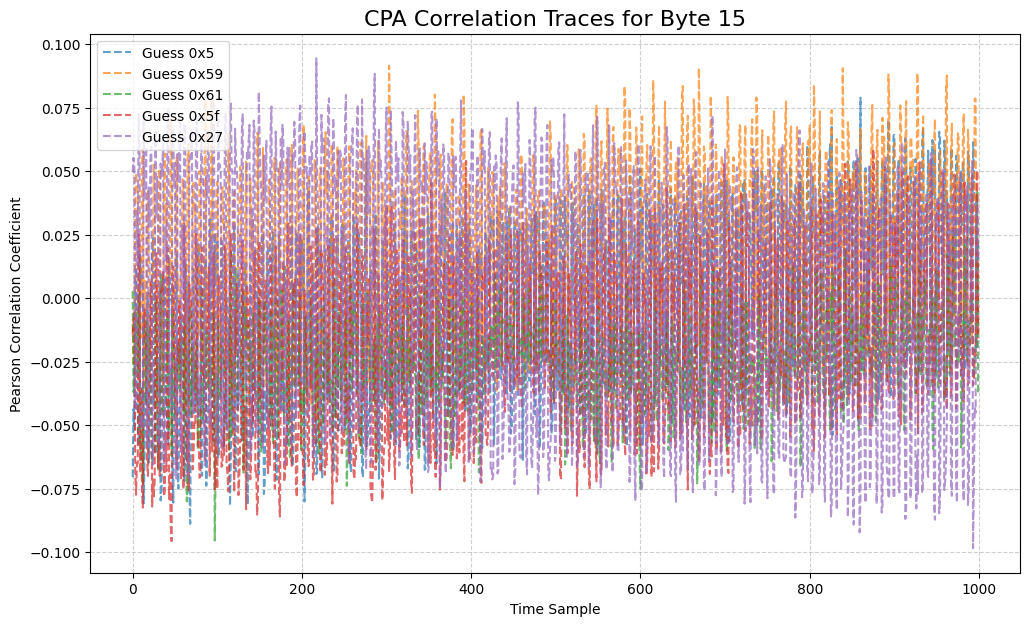


Calculating SNR for byte 15...
   SNR calculated. Max SNR value: 0.2323


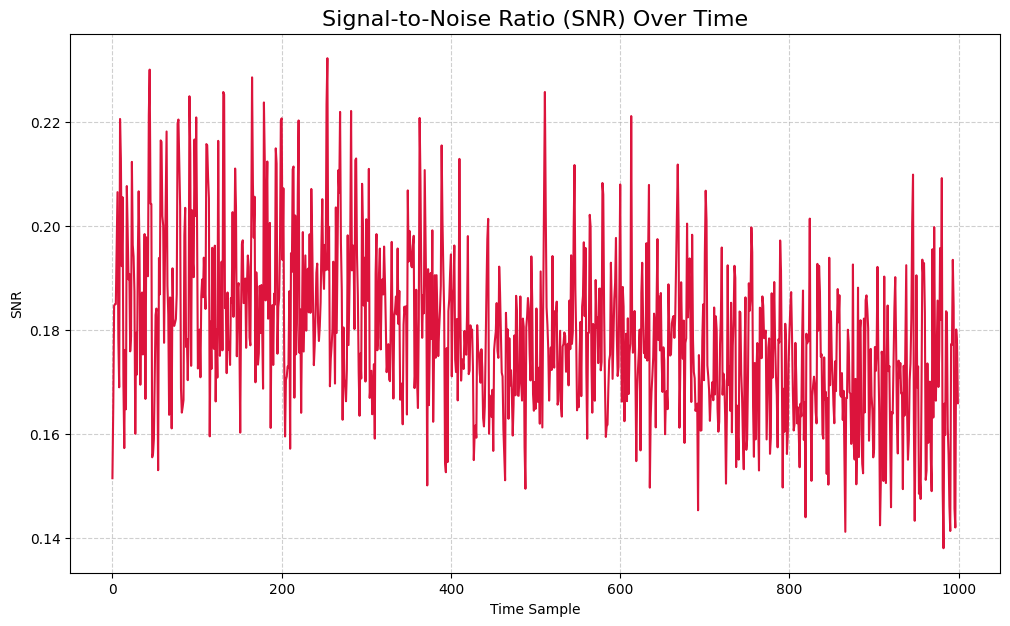


Analysis Complete.


In [65]:
# --- AES Constants (S-Boxes, Rcon) ---

# AES Inverse S-Box (for last-round attack)
INV_S_BOX = np.array([
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
])

# AES Forward S-Box (for key schedule reversal)
S_BOX = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
])

# Round constants for key schedule
RCON = np.array([
    0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36
])

# Hamming Weight lookup table
HW_TABLE = np.array([bin(n).count('1') for n in range(256)], dtype=np.uint8)

class SideChannelAnalyzer:
    """
    A class to perform CPA and DPA attacks on AES power traces.
    Targets the last round: `intermediate = InvSubBytes(InvShiftRows(ciphertext) ^ key)`
    """
    def __init__(self, traces, plaintexts, ciphertexts, correct_key=None):
        """Initializes the analyzer with measurement data."""
        self.traces = traces
        self.plaintexts = plaintexts
        self.ciphertexts = ciphertexts
        self.correct_key = correct_key  # This should be the ORIGINAL key
        self.num_traces = traces.shape[0]
        self.num_samples = traces.shape[1]
        
        print(f"Analyzer initialized with {self.num_traces} traces, each with {self.num_samples} samples.")

    def _inv_shift_rows(self, state):
        """Performs the inverse ShiftRows operation on the AES state."""
        # For AES decryption, we need to reverse the ShiftRows operation
        # The state is a 16-byte array in column-major order
        shifted = np.zeros(16, dtype=np.uint8)
        
        # Row 0: no shift
        shifted[0] = state[0]
        shifted[4] = state[4]
        shifted[8] = state[8]
        shifted[12] = state[12]
        
        # Row 1: right shift by 1
        shifted[1] = state[13]
        shifted[5] = state[1]
        shifted[9] = state[5]
        shifted[13] = state[9]
        
        # Row 2: right shift by 2
        shifted[2] = state[10]
        shifted[6] = state[14]
        shifted[10] = state[2]
        shifted[14] = state[6]
        
        # Row 3: right shift by 3
        shifted[3] = state[7]
        shifted[7] = state[11]
        shifted[11] = state[15]
        shifted[15] = state[3]
        
        return shifted

    def _get_power_hypothesis(self, intermediate_values, model_type='HW'):
        """Calculates the hypothetical power consumption based on a model."""
        if model_type == 'HW':  # Hamming Weight
            return HW_TABLE[intermediate_values]
        elif model_type == 'MSB':  # Most Significant Bit
            return (intermediate_values >> 7) & 1
        else:
            raise ValueError(f"Unsupported power model: {model_type}. Use 'HW' or 'MSB'.")

    def run_cpa(self, target_byte, power_model='HW', trace_limit=None):
        """Performs a Correlation Power Analysis attack on a single byte."""
        limit = trace_limit if trace_limit is not None else self.num_traces
        
        traces_subset = self.traces[:limit, :]
        ciphertexts_subset = self.ciphertexts[:limit]
        
        max_correlations = np.zeros(256)
        correlation_traces = np.zeros((256, self.num_samples))
        
        trace_mean = np.mean(traces_subset, axis=0)
        trace_std_dev = np.std(traces_subset, axis=0)

        for k_guess in range(256):
            # Apply inverse ShiftRows to ciphertext before XOR with key guess
            inv_shifted = np.array([self._inv_shift_rows(ct) for ct in ciphertexts_subset])
            ciphertext_bytes = inv_shifted[:, target_byte]
            
            intermediate_vals = INV_S_BOX[ciphertext_bytes ^ k_guess]
            
            if power_model == 'HD':
                # HD models power consumption of a register flip-flopping.
                # It's the Hamming Weight of the XOR between the old and new state.
                hypothesis = HW_TABLE[intermediate_vals ^ ciphertext_bytes]
            else:
                hypothesis = self._get_power_hypothesis(intermediate_vals, power_model)

            hyp_mean = np.mean(hypothesis)
            hyp_std_dev = np.std(hypothesis)
            
            if hyp_std_dev == 0:
                correlation_traces[k_guess, :] = 0
                continue

            numerator = np.mean(hypothesis[:, np.newaxis] * traces_subset, axis=0) - (hyp_mean * trace_mean)
            denominator = hyp_std_dev * trace_std_dev
            
            # Prevent division by zero at time samples with no variation
            correlation_traces[k_guess, :] = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)
        
        max_correlations = np.max(np.abs(correlation_traces), axis=1)
        return max_correlations, correlation_traces

    def run_dpa(self, target_byte, trace_limit=None):
        """Performs a Differential Power Analysis attack on a single byte."""
        limit = trace_limit if trace_limit is not None else self.num_traces
        
        traces_subset = self.traces[:limit, :]
        ciphertexts_subset = self.ciphertexts[:limit]
        
        max_diffs = np.zeros(256)

        for k_guess in range(256):
            # Apply inverse ShiftRows to ciphertext before XOR with key guess
            inv_shifted = np.array([self._inv_shift_rows(ct) for ct in ciphertexts_subset])
            ciphertext_bytes = inv_shifted[:, target_byte]
            
            intermediate_vals = INV_S_BOX[ciphertext_bytes ^ k_guess]
            selection_bit = self._get_power_hypothesis(intermediate_vals, 'MSB')
            
            traces_set_0 = traces_subset[selection_bit == 0]
            traces_set_1 = traces_subset[selection_bit == 1]
            
            if len(traces_set_0) == 0 or len(traces_set_1) == 0:
                continue
                
            mean_0 = np.mean(traces_set_0, axis=0)
            mean_1 = np.mean(traces_set_1, axis=0)
            max_diffs[k_guess] = np.max(np.abs(mean_1 - mean_0))
            
        return max_diffs
        
    def calculate_snr(self, target_byte, last_round_key_byte):
        """Calculates the SNR for a given byte's intermediate value."""
        print(f"\nCalculating SNR for byte {target_byte}...")
        
        # Apply inverse ShiftRows to ciphertext before XOR with key byte
        inv_shifted = np.array([self._inv_shift_rows(ct) for ct in self.ciphertexts])
        ciphertext_bytes = inv_shifted[:, target_byte]
        
        intermediate_vals = INV_S_BOX[ciphertext_bytes ^ last_round_key_byte]
        
        unique_vals = np.unique(intermediate_vals)
        grouped_traces = [self.traces[intermediate_vals == val] for val in unique_vals]
        
        # Noise: Mean of variances within each group
        variances_per_group = [np.var(group, axis=0) for group in grouped_traces if len(group) > 1]
        mean_of_vars = np.mean(variances_per_group, axis=0)

        # Signal: Variance of means between groups
        means_per_group = [np.mean(group, axis=0) for group in grouped_traces]
        var_of_means = np.var(means_per_group, axis=0)
        
        # Avoid division by zero
        snr = np.divide(var_of_means, mean_of_vars, out=np.zeros_like(var_of_means), where=mean_of_vars!=0)
        
        print(f"   SNR calculated. Max SNR value: {np.max(snr):.4f}")
        return snr

    @staticmethod
    def derive_base_key_128(last_round_key):
        """Reverses the AES-128 key schedule to find the original key."""
        def rot_word(w): return np.roll(w, -1)
        def sub_word(w): return S_BOX[w]

        round_key = last_round_key.copy()
        
        for r in range(10, 0, -1):
            prev_round_key = np.zeros(16, dtype=np.uint8)
            
            prev_round_key[12:16] = round_key[12:16] ^ round_key[8:12]
            prev_round_key[8:12]  = round_key[8:12]  ^ round_key[4:8]
            prev_round_key[4:8]   = round_key[4:8]   ^ round_key[0:4]
            
            temp_word = sub_word(rot_word(prev_round_key[12:16]))
            rcon_word = np.array([RCON[r], 0, 0, 0], dtype=np.uint8)
            prev_round_key[0:4] = round_key[0:4] ^ temp_word ^ rcon_word
            
            round_key = prev_round_key

        return round_key

    def plot_correlation_traces(self, correlation_traces, target_byte, correct_key_byte, num_to_plot=5):
        """Plots the correlation traces for the best guesses."""
        plt.figure(figsize=(12, 7))
        plt.title(f'CPA Correlation Traces for Byte {target_byte}', fontsize=16)
        
        top_indices = np.argsort(np.max(np.abs(correlation_traces), axis=1))[-num_to_plot:]
        
        for k_guess in top_indices:
            label, style, width, alpha = f'Guess {hex(k_guess)}', '--', 1.5, 0.7
            if k_guess == correct_key_byte:
                label, style, width, alpha = f'Guess {hex(k_guess)} (Correct)', '-', 2.5, 1.0
            
            plt.plot(correlation_traces[k_guess], label=label, linestyle=style, linewidth=width, alpha=alpha)
            
        plt.xlabel('Time Sample')
        plt.ylabel('Pearson Correlation Coefficient')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    def plot_snr(self, snr_trace):
        """Plots the calculated SNR over time."""
        if snr_trace is None: return
        plt.figure(figsize=(12, 7))
        plt.title('Signal-to-Noise Ratio (SNR) Over Time', fontsize=16)
        plt.plot(snr_trace, color='crimson')
        plt.xlabel('Time Sample')
        plt.ylabel('SNR')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# --- Main Execution Block ---
if __name__ == '__main__':
    
    # The TRUE original key (for verification purposes)
    TRUE_KEY = np.array([0x10, 0xa5, 0x88, 0x69, 0xd7, 0x4b, 0xe5, 0xa3,
                         0x74, 0xcf, 0x86, 0x7c, 0xfb, 0x47, 0x38, 0x59], dtype=np.uint8)
    

    TRUE_LAST_ROUND_KEY = np.array([0xd5, 0x5e, 0x84, 0xa7, 0x43, 0x25, 0x20, 0xbc, 
                                    0xc0, 0x24, 0x83, 0x88, 0x1d, 0x15, 0x88, 0x00], dtype=np.uint8)
    
    # 2. INITIALIZE ANALYZER
    analyzer = SideChannelAnalyzer(traces, plaintexts, ciphertexts)

    # 3. RECOVER THE FULL LAST ROUND KEY
    recovered_last_round_key = np.zeros(16, dtype=np.uint8)
    power_model_to_use = 'HD' # 'HD' is often effective for the last round
    
    print(f"\n Attacking all 16 key bytes using CPA with '{power_model_to_use}' model...")
    for byte_idx in tqdm(range(16), desc="Attacking Key Bytes"):
        cpa_max_corrs, cpa_corr_traces = analyzer.run_cpa(byte_idx, power_model=power_model_to_use)
        recovered_byte = np.argmax(cpa_max_corrs)
        recovered_last_round_key[byte_idx] = recovered_byte
        
        print(f"   Byte {byte_idx}: Guessed {hex(recovered_byte)} (Correct: {hex(TRUE_LAST_ROUND_KEY[byte_idx])}) -> {'Success!' if recovered_byte == TRUE_LAST_ROUND_KEY[byte_idx] else 'Fail'}")

    print("\n--- Attack Summary ---")
    print(f"Recovered Last Round Key: {bytes(recovered_last_round_key).hex()}")
    print(f"   (Correct Last Round Key: {bytes(TRUE_LAST_ROUND_KEY).hex()})")

    # 4. DERIVE THE ORIGINAL KEY
    print("\nDeriving original key from the last round key...")
    recovered_base_key = SideChannelAnalyzer.derive_base_key_128(recovered_last_round_key)
    print(f"   Derived Original Key:     {bytes(recovered_base_key).hex()}")
    print(f"   True Original Key:        {bytes(TRUE_KEY).hex()}")

    if np.array_equal(recovered_base_key, TRUE_KEY):
        print("\nSUCCESS: The derived original key matches the true key!")
    else:
        print("\nFAILURE: The derived key does not match the true key.")

    # 5. VISUALIZE RESULTS FOR A SINGLE BYTE (e.g., the last one attacked)
    print("\nGenerating plots for the last attacked byte (Byte 15)...")
    target_byte_for_plots = 15
    _, final_corr_traces = analyzer.run_cpa(target_byte_for_plots, power_model=power_model_to_use)
    
    # Plot correlations
    analyzer.plot_correlation_traces(final_corr_traces, target_byte_for_plots, 
                                      correct_key_byte=TRUE_LAST_ROUND_KEY[target_byte_for_plots])
    
    # Plot SNR
    snr_trace = analyzer.calculate_snr(target_byte_for_plots, 
                                       last_round_key_byte=TRUE_LAST_ROUND_KEY[target_byte_for_plots])
    analyzer.plot_snr(snr_trace)

    print("\nAnalysis Complete.")